In [71]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans, DBSCAN, MeanShift, Birch
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('cleaned_subs.csv', low_memory=False)
df

,id,created_at,country,operator,service,source,msisdn,status,cycle,adnet,...,service_price,currency,profile_status,publisher,trxid,pixel,handset,browser,attempt_charging,success_billing
0,302164,2023-09-13 09:47:57,Thailand,ais,459505104.0,sms,66988602911,"active, not renewed",daily,not found,...,6.0,bath,active,not found,2.02309130707494e+19,not found,Not Found,Not Found,15,0
1,3521,2023-09-13 09:21:13,Thailand,ais,459505104.0,sms,66822243080,"active, not renewed",daily,not found,...,6.0,bath,active,not found,2.02309130707243e+19,not found,Not Found,Not Found,15,0
2,1,2023-09-13 09:20:20,Thailand,ais,459505106.0,ivr,666131,"active, not renewed",not found,not found,...,6.0,bath,active,not found,2.02308251402057e+19,not found,Not Found,Not Found,1,1
3,4999335,2023-09-13 14:00:22,Thailand,ais,459505105.0,wap,66650020857,"active, not renewed",daily,star,...,6.0,bath,active,star,2.02309130710521e+19,star,Not Found,Not Found,5,0
4,273196,2023-09-13 09:45:33,Thailand,ais,459505104.0,sms,66635959286,"active, not renewed",daily,not found,...,6.0,bath,active,not found,2.02309130701156e+19,not found,Not Found,Not Found,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,22019,2023-09-14 06:55:36,Oman,omantel,NaN,cp1,96898097014,"active, not renewed",daily,kee,...,300.0,rial,not found,lumos,Not Found,not found,/,Apache-HttpClient,1,0
308907,22037,2023-09-14 06:55:36,Oman,omantel,NaN,cp1,96872209910,"active, not renewed",daily,kee,...,300.0,rial,not found,lumos,Not Found,not found,/,Apache-HttpClient,1,0
308908,22062,2023-09-14 06:55:36,Oman,omantel,NaN,cp1,96891448321,"active, not renewed",daily,kee,...,300.0,rial,not found,lumos,Not Found,not found,/,Apache-HttpClient,1,0
308909,22083,2023-09-14 06:55:36,Oman,omantel,NaN,cp1,96891982806,"active, not renewed",daily,kee,...,300.0,rial,not found,lumos,Not Found,not found,/,Apache-HttpClient,1,0


In [ ]:
df.describe()

,id,service,revenue,renewal_date,freemium_end_date,service_price,attempt_charging,success_billing
count,3.089110e+05,2.000000e+05,308911.000000,0.0,0.0,308911.000000,308911.000000,308911.000000
mean,2.825801e+05,4.595072e+08,4377.785343,NaN,NaN,87.665865,17.335320,2.735024
std,6.253738e+05,2.380718e+03,15032.796506,NaN,NaN,750.756716,22.449904,8.250722
min,1.000000e+00,4.595051e+08,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,6.592650e+04,4.595051e+08,0.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,1.854540e+05,4.595051e+08,0.000000,NaN,NaN,6.000000,15.000000,0.000000
75%,3.512735e+05,4.595099e+08,12.000000,NaN,NaN,6.000000,15.000000,0.000000
max,7.115059e+06,4.595099e+08,506000.000000,NaN,NaN,10000.000000,4015.000000,220.000000


In [ ]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 308911 non-null  int64  
 1   created_at         308911 non-null  object 
 2   country            308911 non-null  object 
 3   operator           308911 non-null  object 
 4   service            200000 non-null  float64
 5   source             308911 non-null  object 
 6   msisdn             308911 non-null  object 
 7   status             308911 non-null  object 
 8   cycle              308911 non-null  object 
 9   adnet              308911 non-null  object 
 10  revenue            308911 non-null  float64
 11  subs_date          308911 non-null  object 
 12  renewal_date       0 non-null       float64
 13  freemium_end_date  0 non-null       float64
 14  unsubs_from        52488 non-null   object 
 15  unsubs_date        308911 non-null  object 
 16  se

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

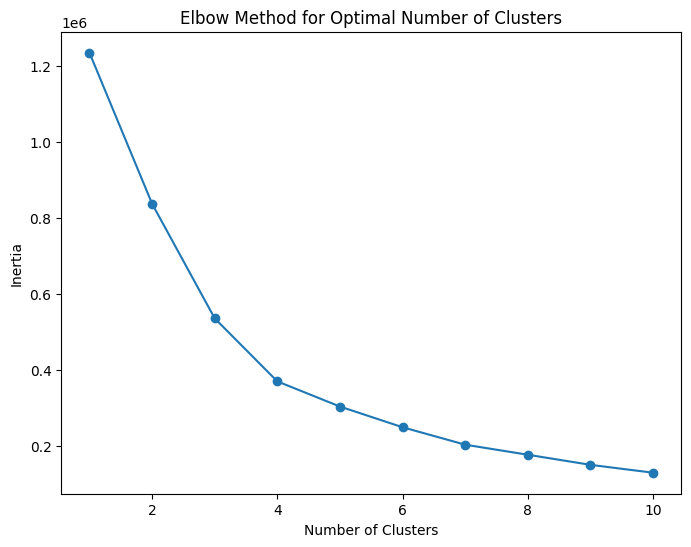

In [ ]:
# Selecting numerical columns
features_kmeans = ['revenue', 'service_price', 'attempt_charging', 'success_billing']

# Extracting numerical data
kmeans_data = data[features_kmeans]

# Standardizing the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kmeans_data)

# Applying the elbow method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):  # Testing clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-64-05a0276dd850>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_data['Cluster'] = clusters_kmeans


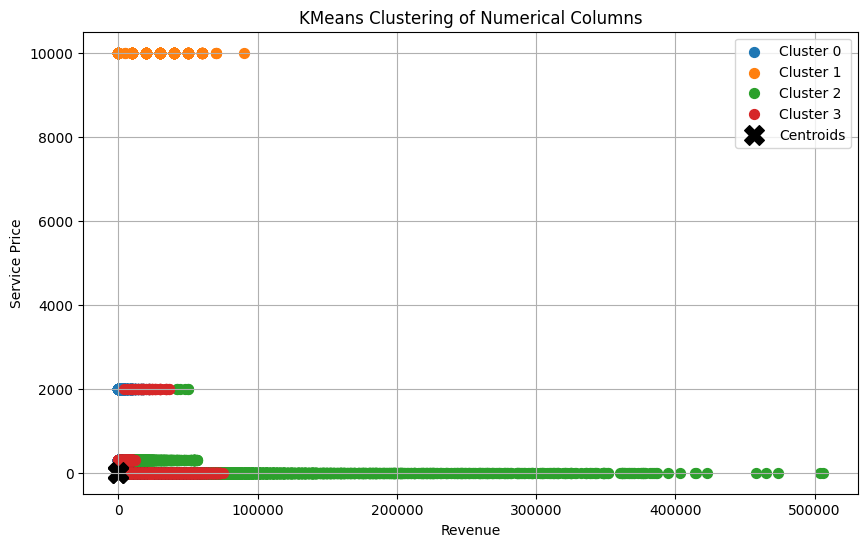

In [ ]:
# Assuming the optimal number of clusters is found to be, for example, 4
optimal_clusters = 4

# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_data)
centroids = kmeans.cluster_centers_

# Adding clusters to the original DataFrame
kmeans_data['Cluster'] = clusters_kmeans

# Visualizing the clustered data
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(kmeans_data[kmeans_data['Cluster'] == i]['revenue'],
                kmeans_data[kmeans_data['Cluster'] == i]['service_price'],
                label=f'Cluster {i}', s=50)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Revenue')
plt.ylabel('Service Price')
plt.title('KMeans Clustering of Numerical Columns')
plt.legend()
plt.grid(True)
plt.show()

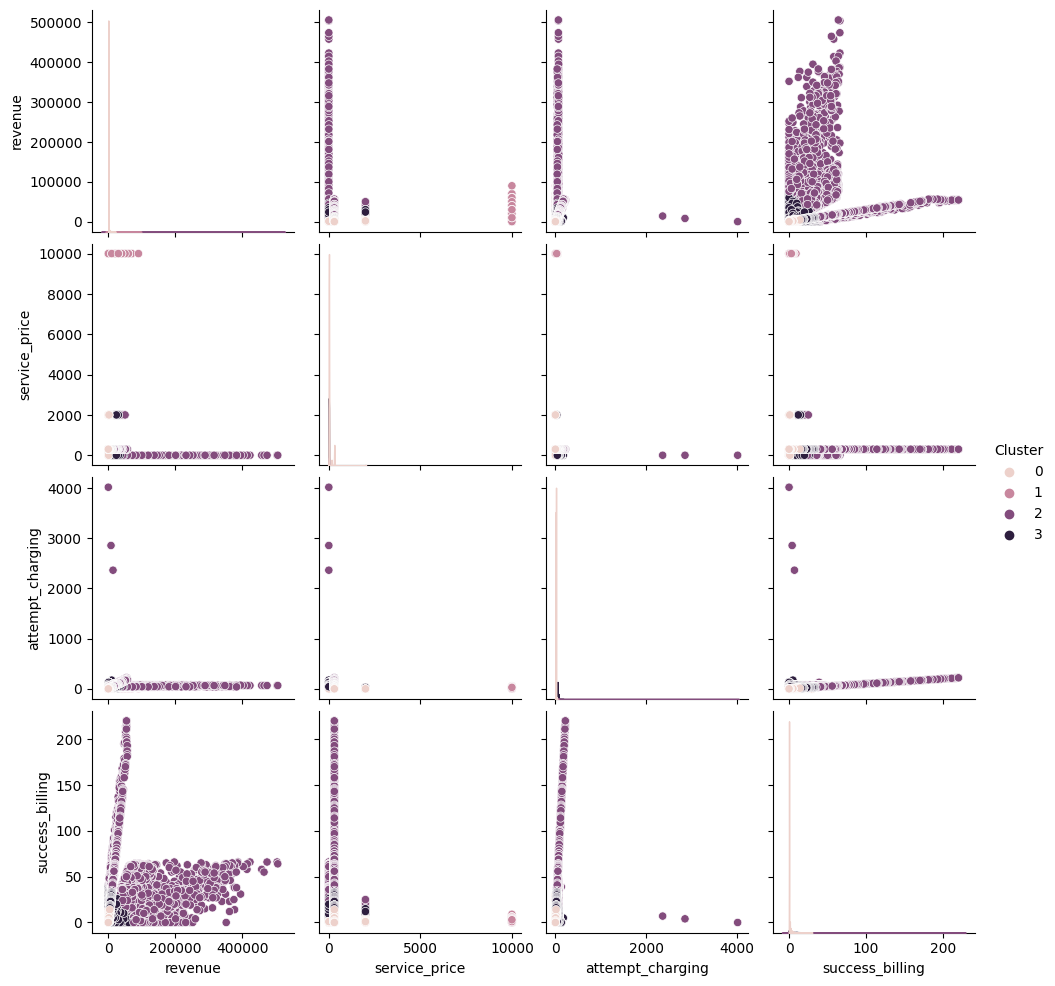

In [ ]:
# Visualizing the clusters in a pairplot
import seaborn as sns

sns.pairplot(data=kmeans_data.join(data['Cluster']), hue='Cluster', diag_kind='kde')
plt.show()

In [ ]:
# Features for GMM clustering
features_gmm = ['revenue', 'service_price', 'cycle', 'profile_status', 'country', 'source', 'attempt_charging', 'success_billing']

# Assuming 'data' is your DataFrame containing the selected features
data_for_gmm = data[features_gmm]

# Perform one-hot encoding for 'country', 'profile_status', 'cycle', and 'source'
encoded_data = pd.get_dummies(data_for_gmm, columns=['cycle', 'profile_status', 'country', 'source'])
data_for_gmm = encoded_data

# Applying GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
clusters_gmm = gmm.fit_predict(data_for_gmm)

# Adding clusters to the original DataFrame
data_for_gmm['Cluster_GMM'] = clusters_gmm

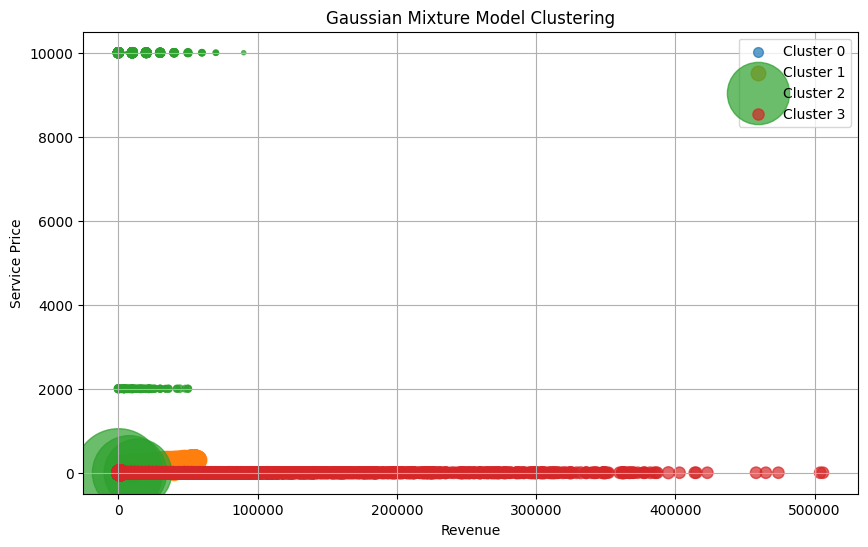

In [ ]:
plt.figure(figsize=(10, 6))

for cluster in range(4):  # Assuming 4 clusters
    plt.scatter(data_for_gmm[data_for_gmm['Cluster_GMM'] == cluster]['revenue'],
                data_for_gmm[data_for_gmm['Cluster_GMM'] == cluster]['service_price'],
                s=data_for_gmm[data_for_gmm['Cluster_GMM'] == cluster]['attempt_charging'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Revenue')
plt.ylabel('Service Price')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
features_birch = ['country', 'status', 'revenue', 'cycle', 'service']

# Extracting data
birch_data = data[features_birch]

# Impute missing values with the mode
birch_data = birch_data.dropna(subset='service')

# Perform one-hot encoding for 'country', 'profile_status', 'cycle', and 'source'
encoded_data = pd.get_dummies(birch_data, columns=['country', 'status', 'cycle', 'service'])
birch_data = encoded_data

# Initialize Birch with desired parameters
birch = Birch(n_clusters=4)  # You can set the number of clusters as needed

# Fit the data
clusters_birch = birch.fit_predict(birch_data)

birch_data['Cluster_birch'] = clusters_birch

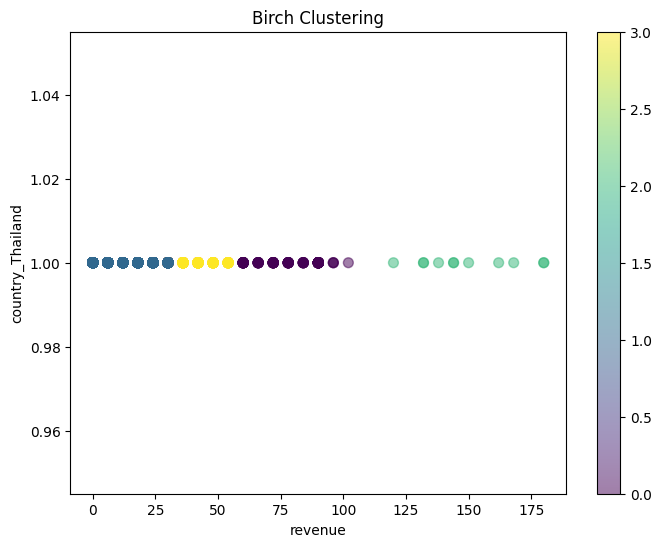

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(birch_data.iloc[:, 0], birch_data.iloc[:, 1], c=clusters_birch, cmap='viridis', s=50, alpha=0.5)

plt.xlabel('revenue')
plt.ylabel('country_Thailand')
plt.title('Birch Clustering')
plt.colorbar()
plt.show()

In [70]:
from kmodes.kmodes import KModes

features_kmodes = ['service', 'source', 'status', 'operator', 'country', 'profile_status', 'publisher', 'adnet', 'cycle', 'currency']

data_kmodes = df[features_kmodes]

# Impute missing values with the mode
data_kmodes = data_kmodes.dropna(subset='service')

# Perform one-hot encoding for the categorical variables
encoded_data = pd.get_dummies(data_kmodes, columns=features_kmodes)
data_kmodes = encoded_data

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)  # You can set the number of clusters as needed
clusters_kmodes = km.fit_predict(data_kmodes)

data_kmodes['Cluster_KModes'] = clusters_kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 235326.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 259674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 256533.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 243764.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 861, cost: 238218.0
Best run was number 1


<Figure size 800x600 with 0 Axes>

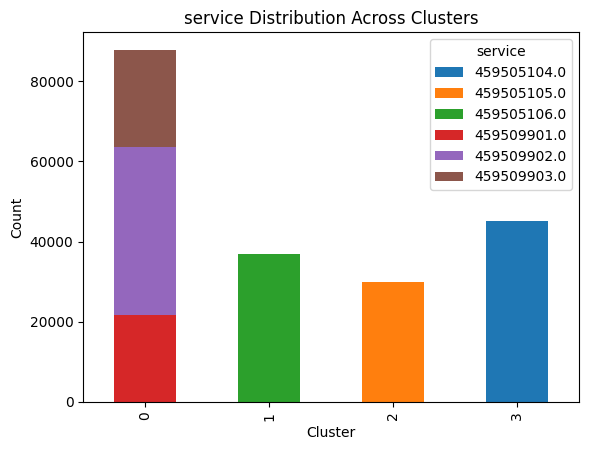

<Figure size 800x600 with 0 Axes>

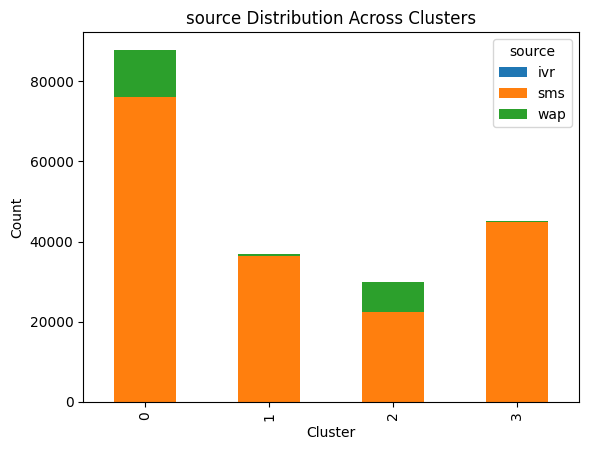

<Figure size 800x600 with 0 Axes>

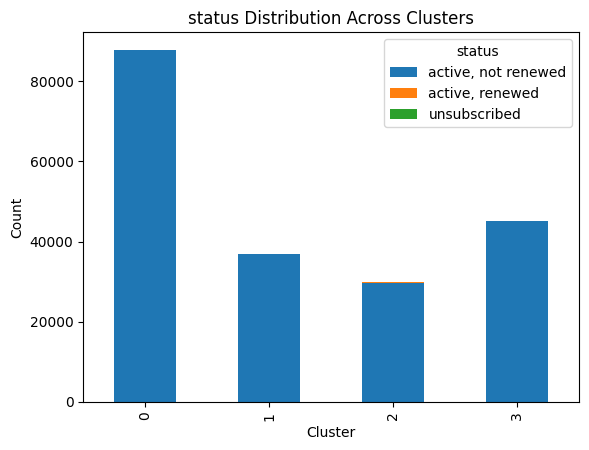

<Figure size 800x600 with 0 Axes>

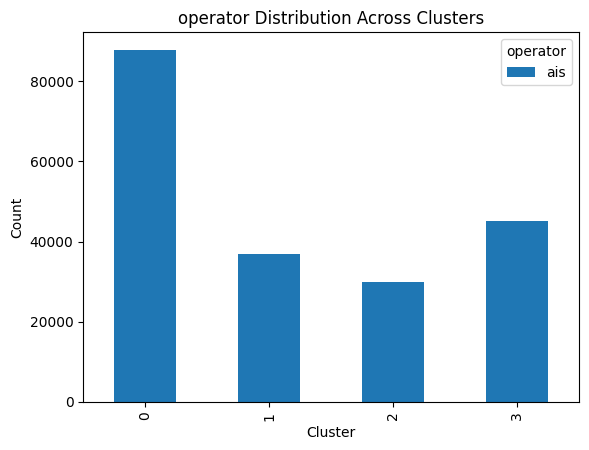

<Figure size 800x600 with 0 Axes>

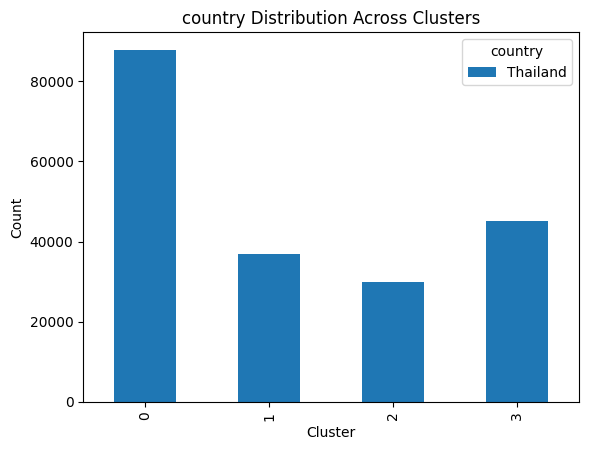

<Figure size 800x600 with 0 Axes>

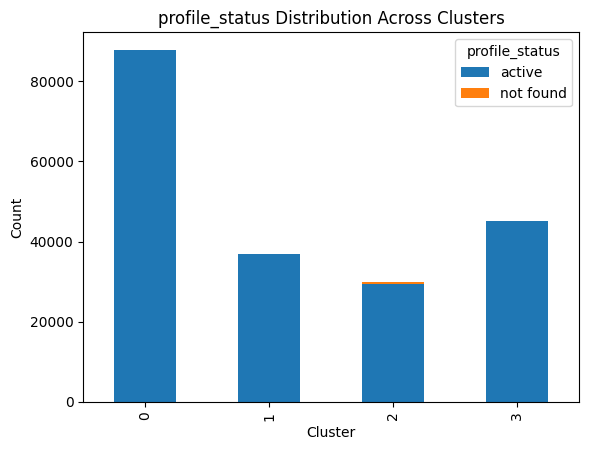

<Figure size 800x600 with 0 Axes>

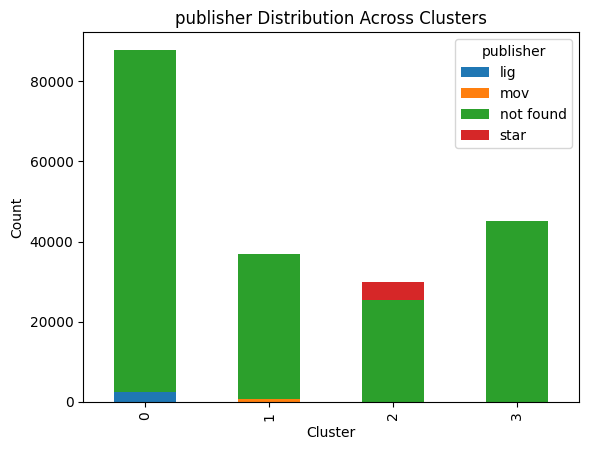

<Figure size 800x600 with 0 Axes>

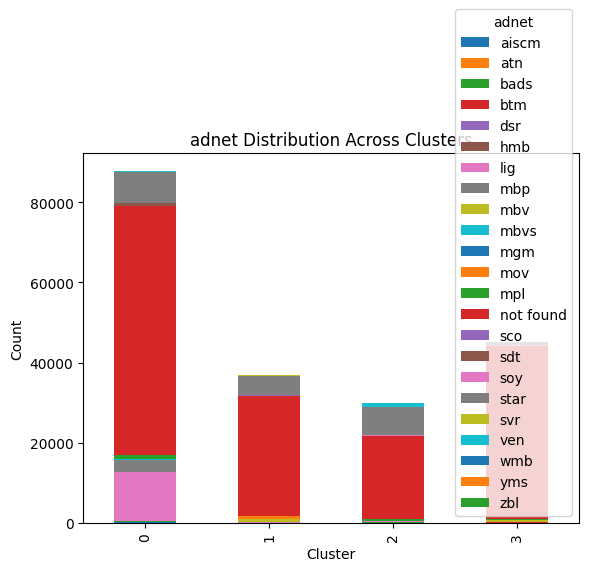

<Figure size 800x600 with 0 Axes>

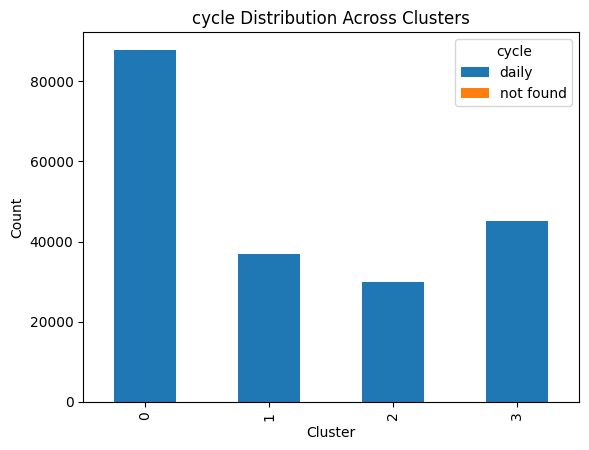

<Figure size 800x600 with 0 Axes>

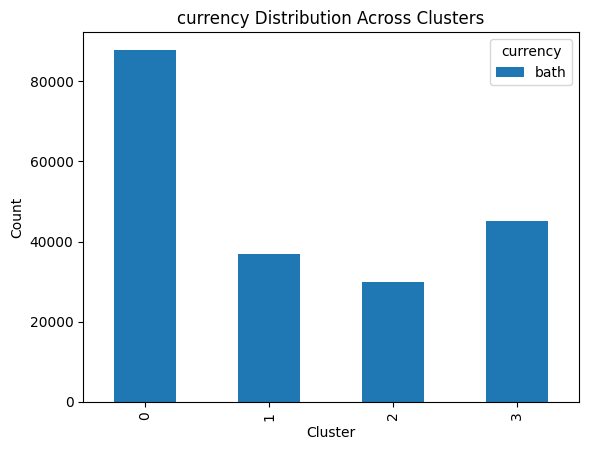

In [ ]:
for feature in features_kmodes:
    plt.figure(figsize=(8, 6))
    data_kmodes.groupby(['Cluster_KModes', feature])[feature].count().unstack().plot(kind='bar', stacked=True)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=feature)
    plt.show()

In [67]:
algorithms_clusters = {'KMeans': clusters_kmeans, 'GMM': clusters_gmm, 'Birch': clusters_birch, 'KModes': clusters_kmodes}

# evaluation metrics
def evaluate_cluster(name, data, labels_pred):
    silhouette = silhouette_score(data, labels_pred)
    davies_bouldin = davies_bouldin_score(data, labels_pred)
    calinski_harabasz = calinski_harabasz_score(data, labels_pred)

    print(f"\nResults for {name} algorithm:")
    print(f"Silhouette Score: {silhouette}")

In [72]:
# K-Means
kmeans_metrics = evaluate_cluster("KMeans", scaled_data, clusters_kmeans)

# Gaussian Mixture Model
gmm_metrics = evaluate_cluster("GMM", data_for_gmm, clusters_gmm)

# Birch
meanshift_metrics = evaluate_cluster("Birch", birch_data, clusters_birch)

# K-Modes
kmodes_metrics = evaluate_cluster("KModes", data_kmodes, clusters_kmodes)


Results for KMeans algorithm:
Silhouette Score: 0.6983973143019458

Results for GMM algorithm:
Silhouette Score: 0.4996946747441537

Results for Birch algorithm:
Silhouette Score: 0.9537703651625458

Results for KModes algorithm:
Silhouette Score: 0.5435766047259253
